In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import glob
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [3]:
resultDir = 'results'
problem = 'cauctions' # choices=['setcover', 'cauctions', 'facilities', 'indset']
sampling_Strategies = ['uniform5','depthK','depthK2'] # choices: uniform5, depthK, depthK2, depthK3
sampling_seed = 0

In [4]:
sampleTimes_allStrategies = pd.DataFrame()
for sampling_Strategy in sampling_Strategies:
    problem_folders = {
        'setcover': f'setcover/500r_1000c_0.05d({sampling_Strategy})/{sampling_seed}',
        'cauctions': f'cauctions/100_500({sampling_Strategy})/{sampling_seed}',
        'facilities': f'facilities/100_100_5({sampling_Strategy})/{sampling_seed}',
        'indset': f'indset/500_4({sampling_Strategy})/{sampling_seed}',
    }
    problem_folder = problem_folders[problem]
    depthTablePath = f'data/samples/{problem_folder}/depthTable(trainSol).csv'
    depthTable = pd.read_csv(depthTablePath, index_col=0)
    sampleTimes_allStrategies[f'{sampling_Strategy}'] = depthTable['sampleTimes']

In [5]:
bin_size = 5
binned = sampleTimes_allStrategies.groupby(sampleTimes_allStrategies.index // bin_size).sum()
binned = binned / binned.sum()
binned['GroupName'] = [f"[{i*bin_size},{(i+1)*bin_size-1}]" for i in binned.index]
binned

,uniform5,depthK,depthK2,GroupName
0,0.122618,0.567493,0.145729,"[0,4]"
1,0.390224,0.236915,0.312563,"[5,9]"
2,0.325601,0.086318,0.249246,"[10,14]"
3,0.114333,0.070707,0.137688,"[15,19]"
4,0.036454,0.032140,0.073367,"[20,24]"
5,0.007457,0.005510,0.046231,"[25,29]"
6,0.002486,0.000000,0.026131,"[30,34]"
7,0.000829,0.000918,0.009045,"[35,39]"


In [9]:
binned = binned.rename(columns={'uniform5':'uniform sampling', 'depthK':'heavy-head sampling', 'depthK2':'depth-info-based sampling'})

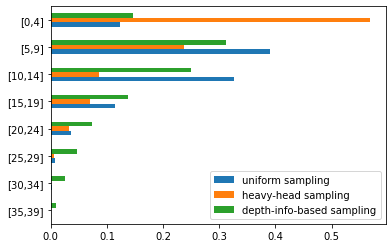

In [10]:
inv_bins = binned.sort_index(ascending=False)
axe = inv_bins.plot.barh()
axe.set_yticklabels(inv_bins['GroupName'])
# axe.savefig(f'depthDist{problem}.pdf')
fig = plt.gcf()
fig.savefig(f'{resultDir}/depthDist_cauctions.pdf')

<Figure size 432x288 with 0 Axes>

# 保存单个 depthTable 的 accessTimes

先读取`depthTable(trainSol).csv`, 这个是保存每种sampling strategy采样过程中的访问深度情况和采样情况，我们只需要读取uniform5 的 depthTable 的 accessTime 列就行了


In [7]:
sampleDir = 'data/samples'
problem = 'setcover' # choices=['setcover', 'cauctions', 'facilities', 'indset']
# sampling_Strategy = 'uniform5' # choices: uniform5, depthK, depthK2, depth_adaptive
sampling_seed = 0

depthTablePaths = {
    'setcover': f'setcover/500r_1000c_0.05d(uniform5)/{sampling_seed}',
    'cauctions': f'cauctions/100_500(uniform5)/{sampling_seed}',
    'facilities': f'facilities/100_100_5(uniform5)/{sampling_seed}',
    'indset': f'indset/500_4(uniform5)/{sampling_seed}',
}
depthTablePath = f'{sampleDir}/{depthTablePaths[problem]}/depthTable(trainSol).csv'
depthTable = pd.read_csv(depthTablePath, index_col=0)

In [8]:
bin_size = 5
binned = depthTable['accessTimes'].groupby(depthTable.index // bin_size).sum()
binned /= binned.sum()
binned.index.name = 'depth//5'
binned

depth//5
0    0.086655
1    0.438031
2    0.355058
3    0.110559
4    0.009635
5    0.000061
Name: accessTimes, dtype: float64

In [9]:
binned.to_csv('depthTable_SolSB_binned5.csv')

In [10]:
dff = pd.read_csv('depthTable_SolSB_binned5.csv', index_col='depth//5')
dff

,accessTimes
depth//5,
0,0.086655
1,0.438031
2,0.355058
3,0.110559
4,0.009635
5,0.000061
